In [1]:
import pandas as pd
import numpy as np
import re
import preprocessor as p

data_dir = "../../data/"
tweets_f = "tweets.csv"
users_f = "users.csv"

tweets_df = pd.read_csv(data_dir + tweets_f)
tweets_df['created_date'] = pd.to_datetime(tweets_df['created_str'])
tweets_df['preprocessed_text'] = tweets_df.apply(lambda row: p.clean(row.text) if isinstance(row.text, str) else None, axis = 1)

tweets_df.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,created_date,preprocessed_text
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,2016-03-22 18:31:42,Are you trying to say that there were no terro...
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN,2016-10-10 20:57:00,"Clinton: Trump should’ve apologized more, atta..."
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN,2017-02-22 12:43:43,: Who was/is the best president of the past ye...
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN,2016-12-26 15:06:41,: I don't have to guess your religion!
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN,2017-08-06 02:36:24,: Pence and his lawyers decided which of his o...


In [2]:
# Helpers
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

stopwords = set(STOPWORDS)
ignore_set = set([''])

def generate_wordcloud(txt):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(txt) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
def filter_corpus(corpus):
    return re.sub(r'http\S+', '', corpus, flags=re.MULTILINE).lower().split(" ")
#     return re.sub(r'\W+', '', corpus).lower().split(" ")

def remove_ignore_set(words):
    result = (" ").join([word for word in words if word not in stopwords])
    return re.sub(r'\W+ ', '', result).split(" ")

In [3]:
corpus = filter_corpus(tweets_df['text'].str.cat(sep=' '))
remove_ignore_set(corpus)[0:10]

['#islamkills',
 'trying',
 'say',
 'terrorist',
 'attacks',
 'europe',
 'refugees',
 'let',
 'inclintontrump',
 'should’ve']

### All tweets

In [71]:
generate_wordcloud(corpus)

TypeError: expected string or bytes-like object

### Tweets after election

In [5]:
import datetime

inauguration_date = '1-20-2017'

after_inauguration_df = tweets_df[(tweets_df['created_date'] > inauguration_date)]
after_inauguration_corpus = filter_corpus(after_inauguration_df['text'].str.cat(sep=' '))
after_inauguration_corpus[0:1000]

['rt',
 '@ltapoll:',
 'who',
 'was/is',
 'the',
 'best',
 'president',
 'of',
 'the',
 'past',
 '25',
 'years?',
 '(vote',
 '&amp;',
 'retweet)',
 'rt',
 '@shareblue:',
 'pence',
 'and',
 'his',
 'lawyers',
 'decided',
 'which',
 'of',
 'his',
 'official',
 'emails',
 'the',
 'public',
 'could',
 'see\r\n\r\n',
 'by',
 '@alisonrose711',
 'rt',
 '@mdblanchfield:',
 'you’ll',
 'never',
 'guess',
 'who',
 'tweeted',
 'something',
 'false',
 'that',
 'he',
 'saw',
 'on',
 'tv',
 '-',
 'the',
 'washington',
 'post',
 '',
 'rt',
 '@radioacr:',
 'chuck',
 'todd',
 'vs',
 'kellyanne',
 'conway...',
 'a',
 'contentious',
 'interview',
 'here,',
 '@21wire',
 'says',
 '@kellyannepolls',
 'owned',
 'chuck',
 'todd',
 '',
 'rt',
 '@k1erry:',
 'the',
 'marco',
 'rubio',
 'knockdown',
 'of',
 'elizabeth',
 'warren',
 'no',
 'liberal',
 'media',
 'outlet',
 'will',
 'cover',
 '',
 'rt',
 '@libsnofun:',
 'who',
 'will',
 'wave',
 'the',
 'flag?',
 '#daywithoutimmigrants',
 '',
 'bewaffnete',
 'attackie

In [ ]:
test_df = get_subset_date_range(tweets_df, start=inauguration_date)
test_corpus = filter_corpus(test_df['text'].str.cat(sep=' '))
test_corpus[0:1000]

In [ ]:
generate_wordcloud(after_inauguration_corpus)

In [83]:
comey_day = '2016-11-06'
comey_start = '2016-11-04'
comey_end = '2016-11-08'

pre_comey_df = get_subset_date_range(tweets_df, start=comey_start, end=comey_day)
post_comey_df = get_subset_date_range(tweets_df, start=comey_day, end=comey_end)

comey_df = get_subset_date(tweets_df, comey_day)
comey_df.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,created_date,preprocessed_text,created_day,hashtag_arr
604,1.679279e+09,ameliebaldwin,1.478453e+12,2016-11-06 17:23:33,0.0,False,0.0,RT @KalalBarry: #PA #CO #MI #MN #WI #NM #VA #O...,7.953157e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""NV"",""NC"",""NH"",""CT"",""OH"",""NJ"",""OR"",""VA"",""NM"",...","[""https://twitter.com/KalalBarry/status/795312...",POSTED,"[""kalalbarry""]",7.953128e+17,NaN,2016-11-06 17:23:33,: Canadians got it right.,2016-11-06,"[NV, NC, NH, CT, OH, NJ, OR, VA, NM, WI, MN, M..."
854,4.272871e+09,pamela_moore13,1.478473e+12,2016-11-06 22:57:32,139.0,False,135.0,An email per second? Americans aren't stupid!😡...,7.953997e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,[],NaN,NaN,2016-11-06 22:57:32,An email per second? Americans aren't stupid! ...,2016-11-06,[]
1346,1.659550e+09,malloryjared,1.478438e+12,2016-11-06 13:16:28,NaN,NaN,NaN,RT @jabgawd: Nobody's perfect ☺️ https://t.co/...,7.952535e+17,NaN,[],[],POSTED,[],NaN,NaN,2016-11-06 13:16:28,: Nobody's perfect ️,2016-11-06,[]
1356,7.892661e+17,worldnewspoli,1.478394e+12,2016-11-06 01:04:36,0.0,False,0.0,VIRAL VIDEO : Emotional Short Film about How T...,7.950693e+17,"<a href=""http://dlvr.it"" rel=""nofollow"">dlvr.i...",[],"[""https://twitter.com/i/web/status/79506933904...",POSTED,[],NaN,NaN,2016-11-06 01:04:36,VIRAL VIDEO : Emotional Short Film about How T...,2016-11-06,[]
2134,3.083845e+09,hollydler,1.478460e+12,2016-11-06 19:28:12,0.0,False,0.0,RT @TrumpTheHill: Its racist to ask 4 ID to vo...,7.953471e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[""""]",POSTED,"[""trumpthehill""]",7.953418e+17,NaN,2016-11-06 19:28:12,: Its racist to ask ID to vote. But common sen...,2016-11-06,[]


In [ ]:
pre_comey_corpus = filter_corpus(pre_comey_df['preprocessed_text'].str.cat(sep=' '))
post_comey_corpus = filter_corpus(post_comey_df['preprocessed_text'].str.cat(sep=' '))
comey_corpus = filter_corpus(comey_df['preprocessed_text'].str.cat(sep=' '))
all_corpus = filter_corpus(tweets_df['preprocessed_text'].str.cat(sep=' '))

print("Pre-Comey:")
print_top_k_words(remove_ignore_set(pre_comey_corpus))
print("--------------")
print("Comey:")
print_top_k_words(remove_ignore_set(comey_corpus))
print("--------------")
print("Post-Comey:")
print_top_k_words(remove_ignore_set(post_comey_corpus))
print("--------------")
print("ALL:")
print_top_k_words(remove_ignore_set(all_corpus))

In [68]:
pre_comey_hashtags = squash_hashtags(pre_comey_df)
post_comey_hashtags = squash_hashtags(post_comey_df)
comey_hashtags = squash_hashtags(comey_df)

all_hashtags = squash_hashtags(tweets_df)

print("Pre-Comey:")
print_top_k_words(pre_comey_hashtags)
print("--------------")
print("Post-Comey:")
print_top_k_words(post_comey_hashtags)
print("--------------")
print("Comey:")
print_top_k_words(comey_hashtags)

print("--------------")
print("ALL:")
print_top_k_words(all_hashtags)

Pre-Comey:
('maga', 60)
('Trump', 32)
('imwithher', 30)
('NeverHillary', 29)
('tcot', 28)
('TrumpPence16', 25)
('SpiritCooking', 23)
('DrainTheSwamp', 19)
('LNYHBT', 16)
('TGDN', 16)
('noDAPL', 15)
('Hillary', 13)
('RememberWhenTrump', 11)
('Clinton', 10)
('TrumpPence2016', 9)
('wikileaks', 9)
('TrumpTrain', 9)
('nowplaying', 8)
('Assange', 8)
('CrookedHillary', 8)
--------------
Post-Comey:
('2016ElectionIn3Words', 315)
('Trump', 64)
('ElectionFinalThoughts', 38)
('maga', 33)
('dncleak2', 29)
('VideoGameABand', 27)
('tcot', 24)
('NeverHillary', 22)
('TrumpTrain', 20)
('America', 19)
('Hillary', 17)
('wikileaks', 15)
('imwithher', 13)
('DrainTheSwamp', 12)
('IfYouLikeThisYoullLoveThat', 12)
('Clinton', 12)
('PodestaEmails', 11)
('SpiritCooking', 11)
('Reno', 10)
('TrumpPence16', 10)
--------------
Comey:
('Trump', 32)
('maga', 25)
('tcot', 19)
('NeverHillary', 18)
('America', 17)
('Hillary', 14)
('SpiritCooking', 11)
('imwithher', 11)
('TrumpTrain', 10)
('Reno', 10)
('HillaryClinton', 

In [84]:
from ast import literal_eval
from collections import Counter 

def get_subset_date_range(df, start=None, end=None):
    assert(start is not None or end is not None)
    if start == end:
        return df[(df['created_date'] >= start + ' 00:00:00') & (df['created_date'] <= start + ' 23:59:59')]
    if start is None:
        return df[(df['created_date'] < end)]
    if end is None:
        return df[(df['created_date'] >= start)]
    return df[(df['created_date'] < end) & (df['created_date'] >= start)]

def get_subset_date(df, date):
    return df[(df['created_date'] >= date + ' 00:00:00') & (df['created_date'] <= date + ' 23:59:59')]

def print_top_k_words(corpus, k=20):
    top_words = get_top_k_words(corpus, k=k)
    for word in top_words:
        print(word)

def get_top_k_words(corpus, k=20):
    c = Counter(corpus)
    if k == -1:
        return dict(c)
    top_words = c.most_common(k)
    return top_words

def hashtags_str_to_arr(hashtag_str):
    if hashtag_str == '[]':
        return []
    return literal_eval(hashtag_str)
    
def squash_hashtags(df):
    hashtags = df['hashtags'].to_numpy()
    hashtags_matrix = [literal_eval(x) for x in hashtags if x != '[]']
    hashtag_squashed = []
    for hashtag_arr in hashtags_matrix:
        hashtag_squashed += hashtag_arr
    return hashtag_squashed

In [100]:
def hashtag_wordcloud(start, end):
    df = get_subset_date_range(tweets_df, start=start, end=end)
    hashtags = squash_hashtags(df)
    generate_wordcloud(' '.join(hashtags))
    
def tweet_wordcloud(start, end):
    df = get_subset_date_range(tweets_df, start=start, end=end)
    corpus = filter_corpus(df['preprocessed_text'].str.cat(sep=' '))
    generate_wordcloud(' '.join(corpus))

def print_top_k_hashtags_for_date(start, end, k=10):
    df = get_subset_date_range(tweets_df, start=start, end=end)
    hashtags = squash_hashtags(df)
    print_top_k_words(hashtags, k=k)

def print_top_k_words_for_date(start, end, k=10):
    df = get_subset_date_range(tweets_df, start=start, end=end)
    corpus = filter_corpus(df['preprocessed_text'].str.cat(sep=' '))
    print_top_k_words(remove_ignore_set(corpus), k=k)
    
def get_top_k_hashtags_for_date(start, end, k=10):
    df = get_subset_date_range(tweets_df, start=start, end=end)
    hashtags = squash_hashtags(df)
    return get_top_k_words(hashtags, k=k)

def get_top_k_words_for_date(start, end, k=10):
    df = get_subset_date_range(tweets_df, start=start, end=end)
    corpus = filter_corpus(df['preprocessed_text'].str.cat(sep=' '))
    return get_top_k_words(remove_ignore_set(corpus), k=k)

In [107]:
import numpy as np
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

In [112]:
from datetime import timedelta
from collections import defaultdict

start = pd.to_datetime('2014-07-14')
end = pd.to_datetime('2017-09-26')

# start = pd.to_datetime('2015-07-14')
# end = pd.to_datetime('2015-07-16')

result = defaultdict()

t = start
while True:
    if t == end:
        break
    t_str = t.strftime('%Y-%m-%d')
    hashtag_counts = dict(get_top_k_hashtags_for_date(t_str, t_str, k=-1))    
    hashtag_objects = [{'text': hashtag, 'size': count} for (hashtag, count) in hashtag_counts.items()]
    normalized_sizes = normalize(list(hashtag_counts.values()))
    for i in range(0, len(hashtag_objects)):
        hashtag_objects[i]['norm_size'] = normalized_sizes[i]
    result[t_str] = hashtag_objects
    t = t + timedelta(days=1)

result['2017-09-24']

[{'text': 'w', 'size': 1, 'norm_size': 1.0}]

In [113]:
import json
with open('hashtags_by_day.json', 'w') as f:
    json.dump(result, f)

In [70]:
print('2014')
print_top_k_hashtags_for_date('2014-01-01', '2014-12-31', k=20)
# print_top_k_words_for_date('2014-01-01', '2014-12-31')
print('2015')
print_top_k_hashtags_for_date('2015-01-01', '2015-12-31', k=20)
# print_top_k_words_for_date('2015-01-01', '2015-12-31')
print('2016')
print_top_k_hashtags_for_date('2016-01-01', '2016-12-31', k=20)
print('2017')
print_top_k_hashtags_for_date('2017-01-01', '2017-12-31', k=20)
# 2014: establish themselves as americans, then 2015: heated political

2014
('Love', 50)
('USA', 31)
('quote', 24)
('America', 16)
('True', 16)
('LifeWouldBeBetterIf', 9)
('Music', 9)
('rap', 8)
('happy', 7)
('summer', 7)
('sadness', 7)
('Kurt_Vonnegut', 6)
('badday', 6)
('Dumb', 6)
('pretty', 6)
('Itunes', 6)
('Faith', 6)
('damnit', 5)
('world', 5)
('RAPCORE', 5)
2015
('news', 582)
('TrumpBecause', 280)
('Prayers4California', 275)
('sports', 269)
('Guns4NY', 236)
('local', 234)
('Politics', 178)
('tcot', 171)
('Iamonfire', 169)
('PhosphorusDisaster', 117)
('GOPDebate', 117)
('teapartynews', 109)
('2A', 97)
('DemnDebate', 90)
('TopNews', 87)
('business', 78)
('health', 70)
('2016election', 66)
('VegasGOPDebate', 66)
('SanBernardino', 63)
2016
('Politics', 3427)
('maga', 2922)
('Trump', 2290)
('tcot', 2047)
('news', 1383)
('NeverHillary', 1374)
('pjnet', 1218)
('TrumpPence16', 979)
('Trump2016', 932)
('MerkelMussBleiben', 796)
('Hillary', 742)
('TrumpTrain', 711)
('HillaryClinton', 696)
('CrookedHillary', 674)
('RejectedDebateTopics', 657)
('WakeUpAmerica'

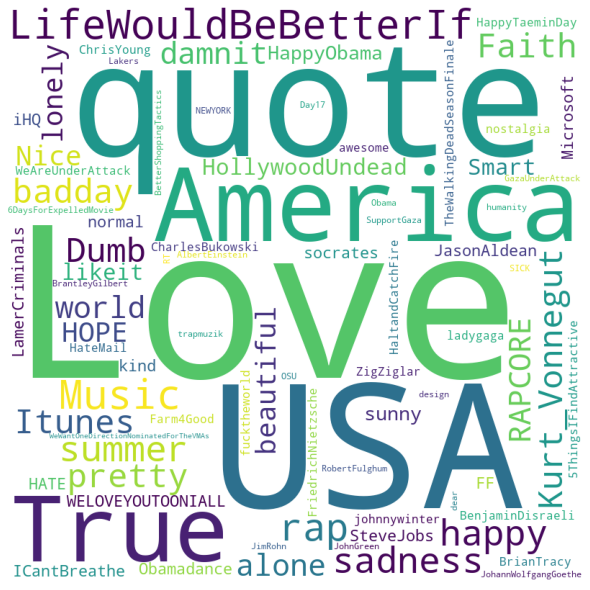

In [76]:
hashtag_wordcloud('2014-01-01', '2014-12-31')

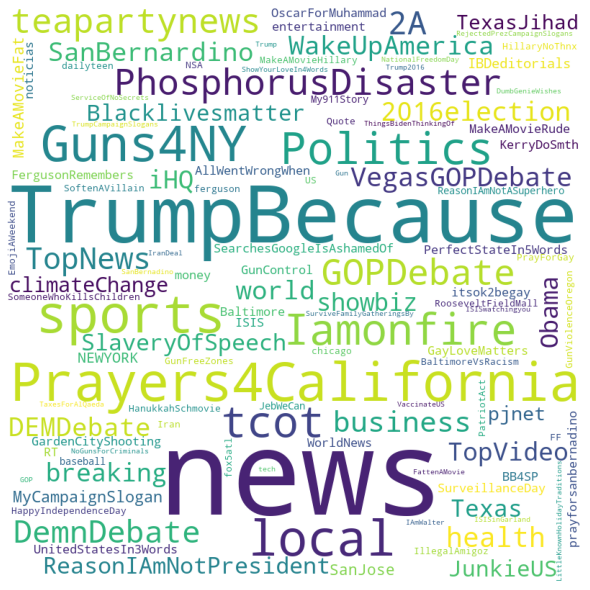

In [77]:
hashtag_wordcloud('2015-01-01', '2015-12-31')

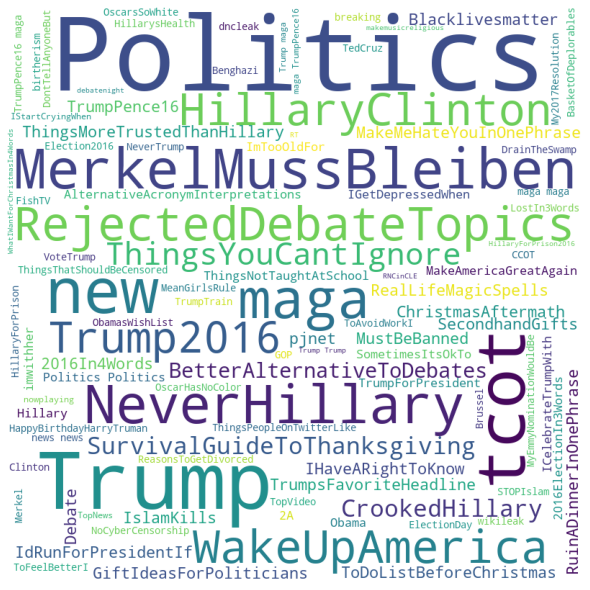

In [78]:
hashtag_wordcloud('2016-01-01', '2016-12-31')

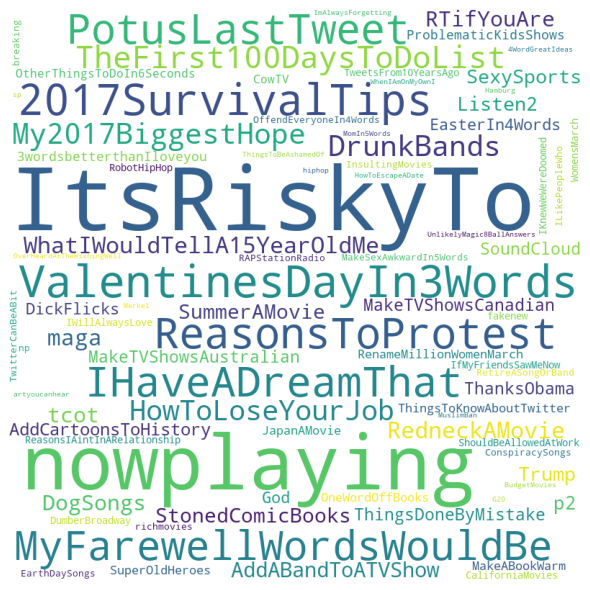

In [79]:
hashtag_wordcloud('2017-01-01', '2017-12-31')

## Tweet wordclouds

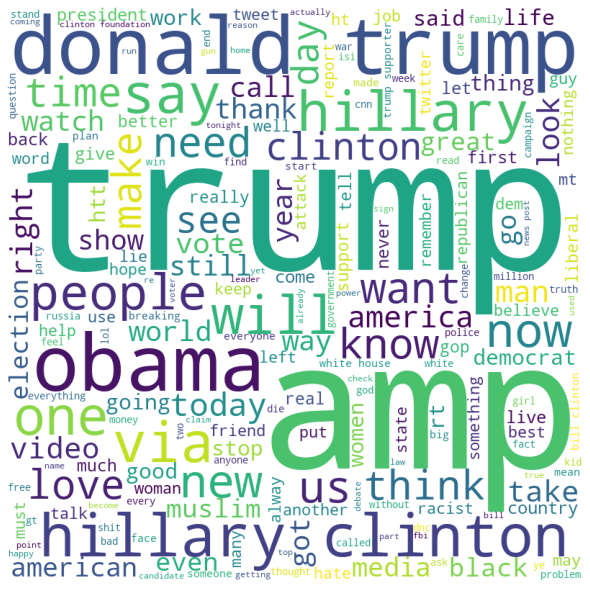

In [81]:
tweet_wordcloud('2014-01-01', '2017-12-31')

In [47]:
print('7/12 - sanders endorses hilary')
print_top_k_hashtags_for_date('2016-07-12', '2016-07-12')
print ('------------------------------')
print('7/21 - trump nomination')
print_top_k_hashtags_for_date('2016-07-21', '2016-07-21')
print ('------------------------------')
print('7/22 - kaine announced as clinton vp')
print_top_k_hashtags_for_date('2016-07-22', '2016-07-22')
print ('------------------------------')
print('7/23 - DNC wikileaks')
print_top_k_hashtags_for_date('2016-07-23', '2016-07-23')
print ('------------------------------')
print('7/28 - Clinton becomes democratic nominee')
print_top_k_hashtags_for_date('2016-07-28', '2016-07-28')
print ('------------------------------')
print('10/7 - Access hollywood tape')
print_top_k_words_for_date('2016-10-07', '2016-10-07')
print ('------------------------------')
print('10/19 - Final presidential debate')
print_top_k_words_for_date('2016-10-19', '2016-10-19')
print ('------------------------------')
print('10/28 - Comey announces FBI investigation into emails')
print_top_k_words_for_date('2016-10-28', '2016-10-28')
print ('------------------------------')
print('10/29 - Comey + 1 day')
print_top_k_words_for_date('2016-10-29', '2016-10-29')


# pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
# ...                    columns=['a', 'b', 'c'])

7/12 - sanders endorses hilary
('DallasMemorial', 4)
('Cleveland', 3)
('NeverHillary', 2)
('Trump2016', 2)
('sports', 2)
('LynchHearing', 2)
('feelthebern', 1)
('VoteTrump2016', 1)
('L', 1)
('Braunau', 1)
------------------------------
7/21 - trump nomination
('MerkelMussBleiben', 796)
('Merkel', 219)
('Politics', 57)
('CDU', 25)
('Cleveland', 19)
('afd', 17)
('RNCinCLE', 16)
('news', 14)
('EU', 14)
('Brexit', 10)
------------------------------
7/22 - kaine announced as clinton vp
('RNCinCLE', 58)
('Politics', 40)
('Munich', 28)
('DNCLeaks', 16)
('news', 14)
('Cleveland', 10)
('Pence', 10)
('breaking', 9)
('NeverHillary', 5)
('Trump2016', 5)
------------------------------
7/23 - DNC wikileaks
('dncleak', 21)
('ComicConIn5Words', 19)
('Politics', 16)
('DNCLeaks', 11)
('ItMayComeAsAShockToYouBut', 10)
('Trump', 9)
('Munich', 8)
('ImWithThem', 8)
('news', 6)
('AmericaFirst', 3)
------------------------------
7/28 - Clinton becomes democratic nominee
('Politics', 91)
('news', 21)
('DemsInP

In [69]:
# round up to day
# plot number of times hashtag mentioned over time

# squash hashtags: takes in df, outputs all hashtags in rows
# day_df = group df by day
# squash hashtags for day-df
# append count(hashtag) to y axis
# day to x axis

tweets_df['created_day'] = (tweets_df['created_date']).dt.floor('d')
tweets_df['hashtag_arr'] = tweets_df.apply(lambda row: hashtags_str_to_arr(row.hashtags), axis = 1) 
tweets_df.head()

# group by day
# get count of given 

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,created_date,preprocessed_text,created_day,hashtag_arr
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,2016-03-22 18:31:42,Are you trying to say that there were no terro...,2016-03-22,[IslamKills]
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN,2016-10-10 20:57:00,"Clinton: Trump should’ve apologized more, atta...",2016-10-10,[]
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN,2017-02-22 12:43:43,: Who was/is the best president of the past ye...,2017-02-22,[]
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN,2016-12-26 15:06:41,: I don't have to guess your religion!,2016-12-26,[ChristmasAftermath]
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN,2017-08-06 02:36:24,: Pence and his lawyers decided which of his o...,2017-08-06,[]


In [ ]:
tweets_df